**Informe Plataforma Familiar E-commerce**

DataSet con sus respectivos campos:

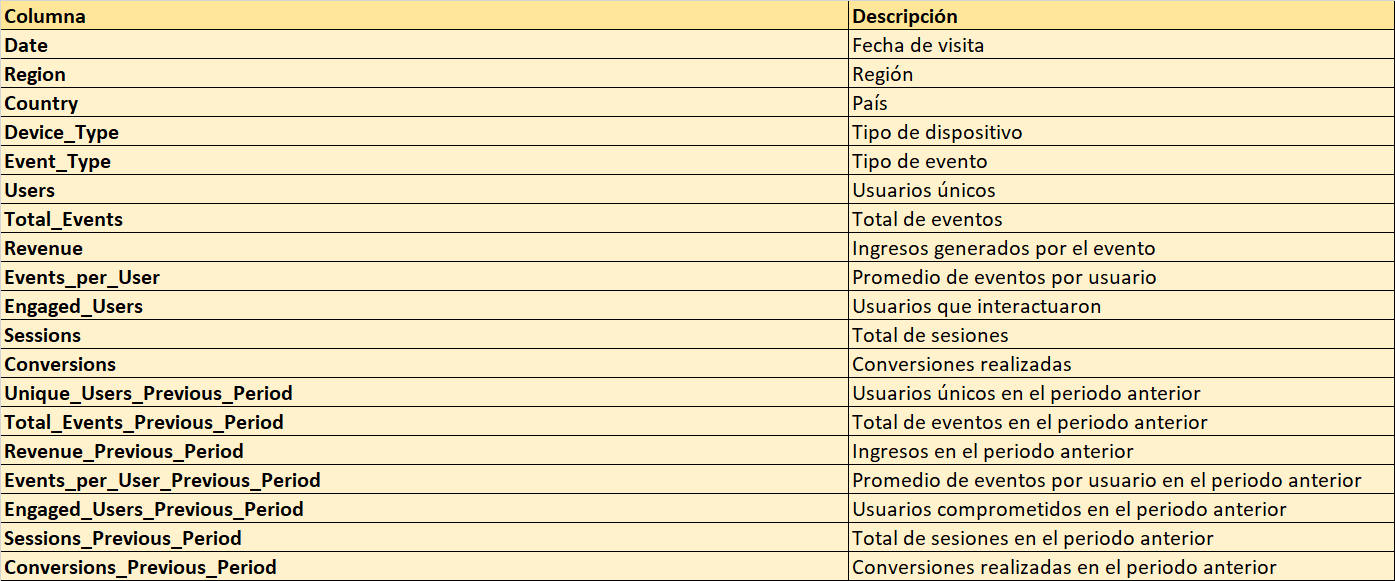

Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


# Nueva sección

In [4]:
# Cargar el archivo CSV
data = pd.read_csv('eccommercefamiliar-eventos.csv')

Exploración de Datos

In [5]:
# Ver las primeras filas del DataFrame
print(data.head())

# Describir el DataFrame
print(data.describe())

                                    Date Region Country      Device_Type  \
2024-11-14  Santiago Metropolitan Region  Chile  mobile        page_view   
2024-11-14  Santiago Metropolitan Region  Chile  mobile    session_start   
2024-11-14  Santiago Metropolitan Region  Chile  mobile      first_visit   
2024-11-14  Santiago Metropolitan Region  Chile  mobile  user_engagement   
2024-11-13  Santiago Metropolitan Region  Chile  mobile      first_visit   

            Users  Total_Events  Revenue  Event_per_User  Engaged_Users  \
2024-11-14     13            48      0.0        3.428571             48   
2024-11-14     13             0      0.0        0.000000             15   
2024-11-14     12             0      0.0        0.000000             12   
2024-11-14     11             0      0.0        0.000000             36   
2024-11-13      6             0      0.0        0.000000              6   

            Sessions  Conversions  Unique_Users_Previous_Period  \
2024-11-14       0.0     

Nos proporciona una vista rápida de las primera cinco filas del DataFrame para verificar la carga y formato de los datos, un resumen estadístico de las columnas númericas que revelan su distribución, variabilidad y tendencias claves.

Limpieza de datos

In [6]:
# Comprobar valores nulos
print(data.isnull().sum())

# Eliminar o rellenar valores nulos
data.fillna(0, inplace=True)  # Ejemplo de llenado

Date                               0
Region                             0
Country                            0
Device_Type                        0
Users                              0
Total_Events                       0
Revenue                            0
Event_per_User                     0
Engaged_Users                      0
Sessions                           0
Conversions                        0
Unique_Users_Previous_Period       0
Total_Events_Previous_Period       0
Revenue_Previous_Period            0
Events_per_User_Previous_Period    0
Engaged_Users_Previous_Period      0
Sessions_Previous_Period           0
Conversions_Previous_Period        0
dtype: int64


Podemos identificar la existencia de valores nulos en el conjunto de datos y luego el manejo rellenándolo con ceros, asegurando que todas las columnas tengan datos completos para ánalisis posteriores.

Análisis Exploratorio de Datos (EDA)

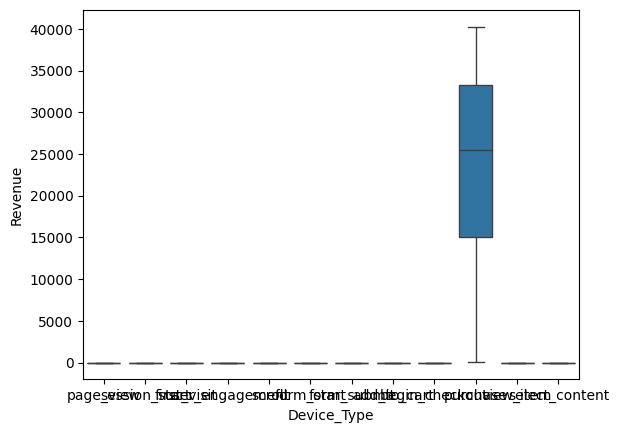

In [7]:
# Visualizar la distribución de ingresos por tipo de dispositivo
sns.boxplot(x='Device_Type', y='Revenue', data=data)
plt.show()

El gráfico permite comparar visualmente la variabilidad y la tendencia central de los ingresos para diferentes tipos de dispositivos, facilitando la identificación de patrones o diferencias significativas en los ingresos generados por cada tipo de dispositivo.

Ejecución de Mapa de Calor

                                    Date Region Country      Device_Type  \
2024-11-14  Santiago Metropolitan Region  Chile  mobile        page_view   
2024-11-14  Santiago Metropolitan Region  Chile  mobile    session_start   
2024-11-14  Santiago Metropolitan Region  Chile  mobile      first_visit   
2024-11-14  Santiago Metropolitan Region  Chile  mobile  user_engagement   
2024-11-13  Santiago Metropolitan Region  Chile  mobile      first_visit   

            Users  Total_Events  Revenue  Event_per_User  Engaged_Users  \
2024-11-14     13            48      0.0        3.428571             48   
2024-11-14     13             0      0.0        0.000000             15   
2024-11-14     12             0      0.0        0.000000             12   
2024-11-14     11             0      0.0        0.000000             36   
2024-11-13      6             0      0.0        0.000000              6   

            Sessions  Conversions  Unique_Users_Previous_Period  \
2024-11-14       0.0     

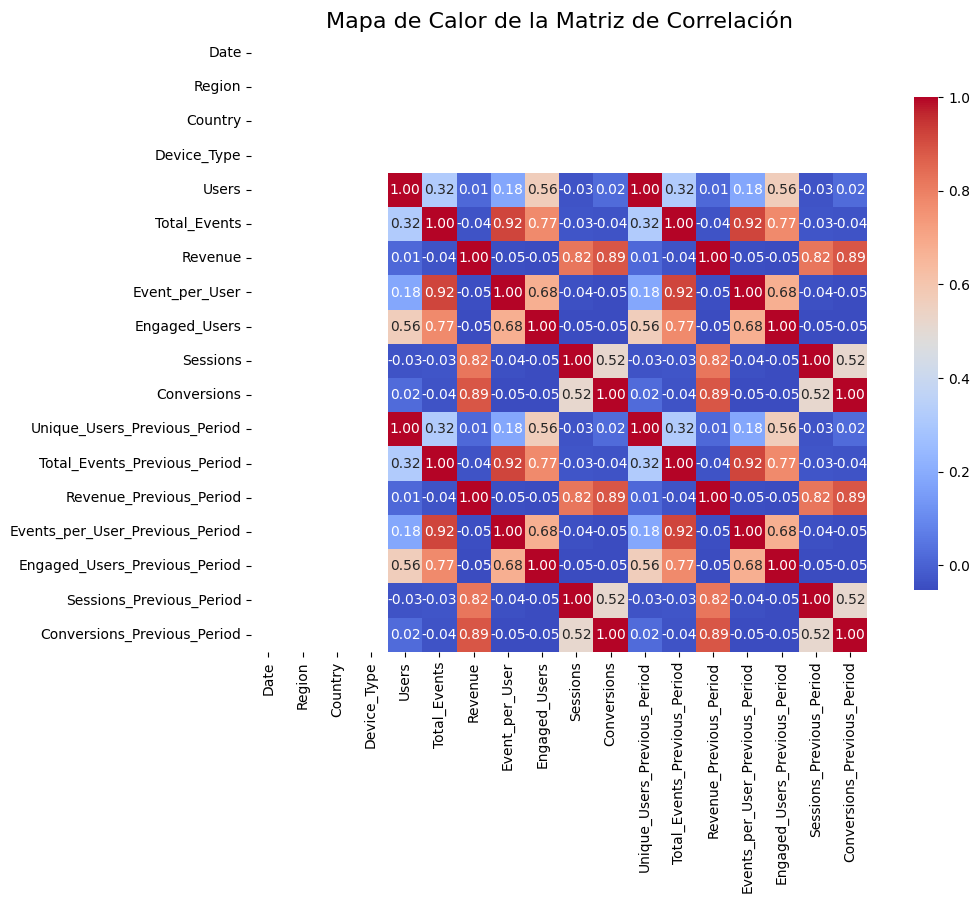

In [8]:
# Mostrar las primeras filas del DataFrame
print(data.head())

# Mostrar información del DataFrame
print(data.info())

# Convertir columnas a numéricas si es posible
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Seleccionar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Verificar la matriz de correlación
print(correlation_matrix)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Personalizar el título
plt.title('Mapa de Calor de la Matriz de Correlación', fontsize=16)
plt.show()

El mapa de calor nos permite revisar y preparar los datos, calcular y visualizar las correlaciones entre variables númericas, lo que es esencial para identificar relaciones significativas en el ánalisis de datos. Representación visual clara que facilita la interpretación de las relaciones.

**Modelo No Supervisado**

K-Means Clustering

Selección de características que se utilizarán para el clustering. Utilizaremos Usuarios, Total de Eventos e Ingresos

In [9]:
# Seleccionar las características relevantes
features = data[['Users', 'Total_Events', 'Revenue']]

# Eliminar filas con valores nulos
features = features.dropna()

Normalización de los datos, procedemos a normalizar los datos para que los campos tengan el mismo peso

In [10]:
# Normalizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Ejecución de algoritmo de K-Means.

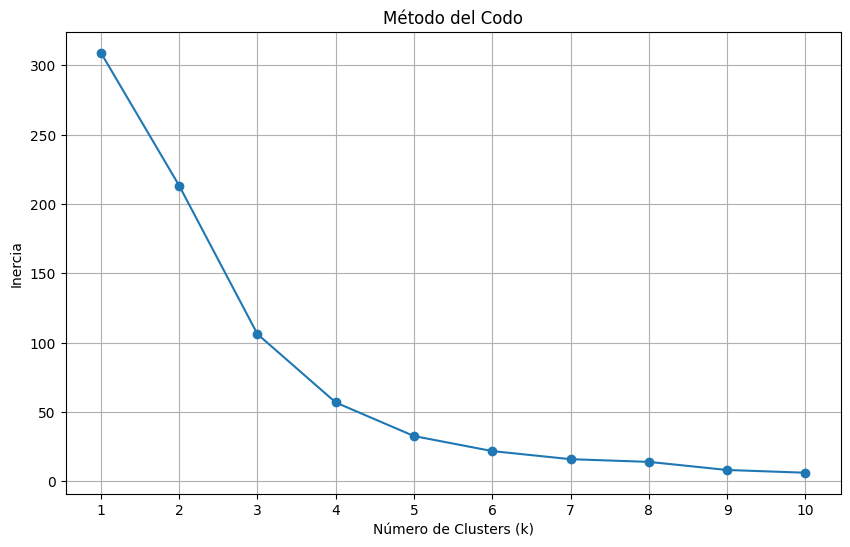

In [11]:
# Método del codo para encontrar el número óptimo de clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Implementamos el método del codo para determinar el número óptimo de clusters en K-Means. Calculamos la inercia para diferentes valores de k (1 al 10) y almacenamos estos valores en una lista. Luego, graficamos la inercia en función de K, permitiendo visualizar el punto donde la reducción de inercia se vuelve menos significativa. Esté siguiente ánalisis nos ayuda a seleccionar un valor adecuado para k, mejorando la calidad de la agrupación de los datos.

Elección de número de clusters y ajustamos el modelo

In [12]:
# Ajustar el modelo K-Means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Ver los resultados
print(data[['Users', 'Total_Events', 'Revenue', 'Cluster']].head())

            Users  Total_Events  Revenue  Cluster
2024-11-14     13            48      0.0        2
2024-11-14     13             0      0.0        0
2024-11-14     12             0      0.0        0
2024-11-14     11             0      0.0        0
2024-11-13      6             0      0.0        0


Ajustamos el modelo con 3 clusters a los datos ya normalizados y asignamos cada punto de datos a uno de los clusters. Los resultados se almacenan en una nueva columa llamada Cluster dentro del DataFrame original. Finalmente, se arroja las primeras filas del DataFrame, mostrando las columnas Users, Total_Events, Revenue y la asignaación del Cluster correspondiente para cada entrada.

Visualización de los resultados

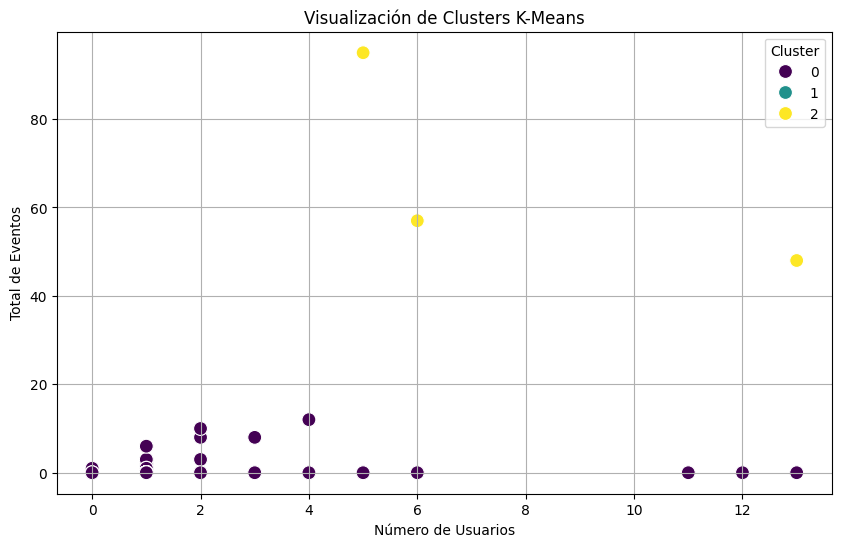

In [13]:
# Visualizar los clusters en un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Users'], y=data['Total_Events'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Visualización de Clusters K-Means')
plt.xlabel('Número de Usuarios')
plt.ylabel('Total de Eventos')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Generamos un gráfico de dispersión que visualiza los clusters obtenidos del modelo K-Means, utilizando el número de usuarios en el eje x y el total de eventos en el eje y. Cada punto se colorea según su asignación a un clúster, facilitando la identificación de patrones en los datos. El gráfico incluye etiquetas para los ejes, un título y una leyenda que indica la agrupación de los puntos.

Interpretación de los resultados

In [14]:
# Calcular las medias de cada cluster
cluster_means = data.groupby('Cluster')[['Users', 'Total_Events', 'Revenue']].mean()
print(cluster_means)

            Users  Total_Events       Revenue
Cluster                                      
0        2.175258      0.608247      0.268042
1        2.333333      0.000000  30422.666362
2        8.000000     66.666667      0.000000


Calculamos las medias de las columnas Users, Total_Events y Revenue para cada clúster en el modelo. Los resultados se almacenan en un DataFrame llamado cluster_means, que muestra cómo se comportan en promedio los usuarios dentro de cada grupo. Finalmente, se imprimen las medias, proporcionando una visión general de las columnas de cada clúster.

**Modelos Supervisados**

Regresión Logística

Selección de columnas y variables de objetivos

In [15]:
# Crear una nueva columna que indique si hubo conversión
data['Conversion'] = np.where(data['Conversions'] > 0, 1, 0)

# Seleccionar las columnas relevantes
features = data[['Users', 'Total_Events', 'Revenue']]
target = data['Conversion']

Definimos las columnas que se utilizarán para predecir si hubo una conversión, facilitando el entrenamiento y evaluación de modelos predictivos.

División de datos en conjuntos de entrenamiento y prueba

In [16]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]}')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]}')

Tamaño del conjunto de entrenamiento: 72
Tamaño del conjunto de prueba: 31


Logramos visualizar cómo se dividen los datos en conjuntos de entrenamiento y prueba, asignando el 70% a entrenamiento y el 30% a prueba. Luego, imprime el número de muestras en cada conjunto, proporcionando información sobre el tamaño de los datos utilizados para el entrenamiento y la evaluación del modelo.

Ajuste del modelo

In [17]:
# Ajustar el modelo de Regresión Logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Crea y entrena un modelo de Regresión Logística utilizando los datos de entrenamiento. Establece random_state=42 para asegurar la reproducibilidad, ajustando el modelo de características (X_train) y la variable objetivo (y_train).

Predicción del Modelo

In [18]:
# Realizar predicciones
y_pred = model.predict(X_test)

Logramos hacer predicciones. La variable y_pred almacena las predicciones sobre el conjunto de prueba (X_test), indicando si se espera que ocurra una conversión (0 u 1) para cada muestra en el conjunto de prueba.


Evaluación del modelo

Precisión del modelo: 0.97


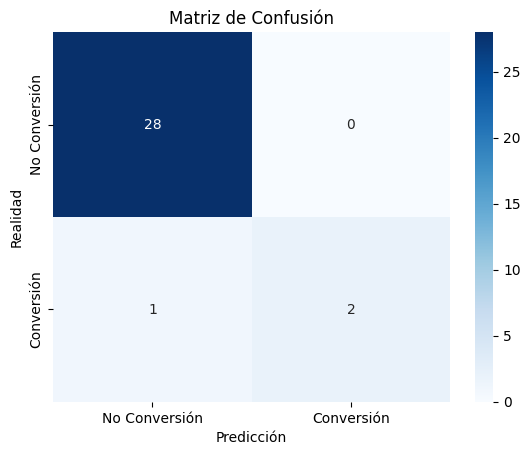

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.67      0.80         3

    accuracy                           0.97        31
   macro avg       0.98      0.83      0.89        31
weighted avg       0.97      0.97      0.96        31



In [19]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Conversión', 'Conversión'], yticklabels=['No Conversión', 'Conversión'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Informe de clasificación
print(classification_report(y_test, y_pred))

Nos permite calcular el modelo y mostrar su precisión, visualizando los resultados mediante una matriz de confusión y proporcionando un informe detallado de clasificación, facilitando la comprensión de cómo se comporta el modelo en diferentes aspectos de la predicción.

Árboles de decisión

Selección de Columnas y variables objetivos

In [20]:
# Crear una nueva columna que indique si hubo conversión
data['Conversion'] = np.where(data['Conversions'] > 0, 1, 0)

# Seleccionar las columnas relevantes
features = data[['Users', 'Total_Events', 'Revenue']]
target = data['Conversion']

Logramos crear una nueva columna llamada Conversion en el DataFrame, que nos establece en 1 si la columna Conversions es mayor que 0, indicando que hubo una conversión, y en 0 en caso contrario. Luego, selecciona las columnas relevantes (Users, Total_Events, Revenue) para el ánalisis y define a Target como la columna Conversion, preparando los datos para un modelo de predicción.

División de datos en conjuntos de entrenamiento y prueba

In [21]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]}')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]}')

Tamaño del conjunto de entrenamiento: 72
Tamaño del conjunto de prueba: 31


Logramos visualizar cómo se dividen los datos en conjuntos de entrenamiento y prueba, asignando el 70% a entrenamiento y el 30% a prueba. Luego, imprime el número de muestras en cada conjunto, proporcionando información sobre el tamaño de los datos utilizados para el entrenamiento y la evaluación del modelo.

Ajuste del modelo

In [22]:
# Ajustar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Crea y entrena un modelo de Árbol de Decisión utilizando los datos de entrenamiento. Establece random_state=42 para asegurar la reproducibilidad. El método fit ajusta el modelo a las columnas (x_train) y la variable objetivo (y_train)

Predicción del Modelo

In [23]:
# Realizar predicciones
y_pred = model.predict(X_test)

Logramos hacer predicciones. La variable y_pred almacena las predicciones sobre el conjunto de prueba (X_test), indicando si se espera que ocurra una conversión (0 u 1) para cada muestra en el conjunto de prueba.


Evaluación del modelo

Precisión del modelo: 0.94


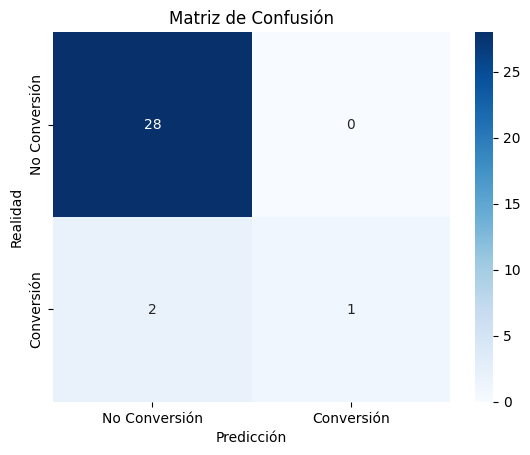

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.33      0.50         3

    accuracy                           0.94        31
   macro avg       0.97      0.67      0.73        31
weighted avg       0.94      0.94      0.92        31



In [24]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Conversión', 'Conversión'], yticklabels=['No Conversión', 'Conversión'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Informe de clasificación
print(classification_report(y_test, y_pred))

Nos demuestra una evaluación completa del modelo, mostrando su precisión, visualizando los resultados mediante una matriz de confusión y ofreciendo un informe detallado de clasificación.

Visualización del Árbol de Decisiones

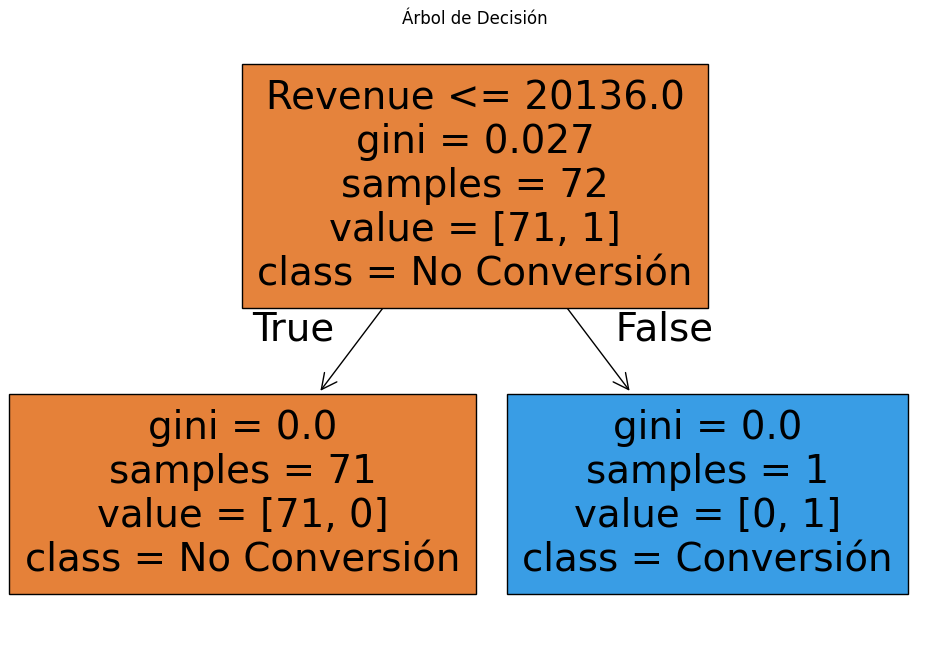

In [25]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=features.columns, class_names=['No Conversión', 'Conversión'], filled=True)
plt.title('Árbol de Decisión')
plt.show()

Representación gráfica del árbol de decisión que ilustra cómo se toman las decisiones basadas en características del modelo, facilitando la comprensión de las reglas de decisión

Random Forest

Selección de Columnas y variables objetivos

In [26]:
# Crear una nueva columna que indique si hubo conversión
data['Conversion'] = np.where(data['Conversions'] > 0, 1, 0)

# Seleccionar las características relevantes
features = data[['Users', 'Total_Events', 'Revenue']]
target = data['Conversion']

Logramos crear una nueva columna llamada Conversion en el DataFrame, que nos establece en 1 si la columna Conversions es mayor que 0, indicando que hubo una conversión, y en 0 en caso contrario. Luego, selecciona las columnas relevantes (Users, Total_Events, Revenue) para el ánalisis y define a Target como la columna Conversion, preparando los datos para un modelo de predicción.

División de datos en conjuntos de entrenamiento y prueba

In [27]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]}')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]}')

Tamaño del conjunto de entrenamiento: 72
Tamaño del conjunto de prueba: 31


Logramos visualizar cómo se dividen los datos en conjuntos de entrenamiento y prueba, asignando el 70% a entrenamiento y el 30% a prueba. Luego, imprime el número de muestras en cada conjunto, proporcionando información sobre el tamaño de los datos utilizados para el entrenamiento y la evaluación del modelo.


Ajuste del modelo

In [28]:
# Ajustar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Crea y entrena el modelo utilizando 100 árboles de decisión (n_estimators=100). Establece que random_state=42 garantiza la reproducibilidad de los resultados. El método fit ajusta el modelo a los datos de entrenamiento (X_train y y_train).

Predicción del Modelo

In [29]:
# Realizar predicciones
y_pred = model.predict(X_test)

Realizamos predicciones sobre el conjunto de prueba (X_test). Las predicciones se almacenan en la variable y_pred, indicando si se espera que ocurra una conversión (0 u 1) para cada muestra en el conjunto de prueba.

Evaluación del modelo

Precisión del modelo: 0.90


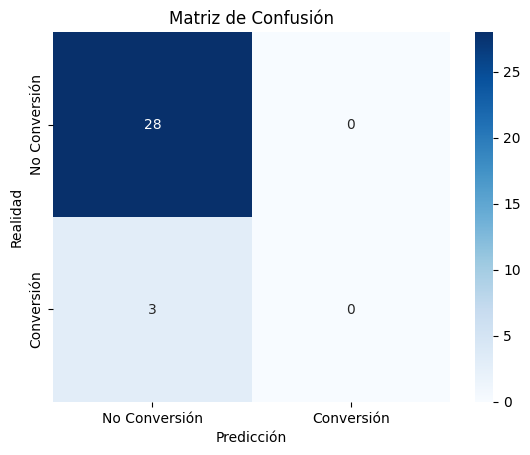

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       0.00      0.00      0.00         3

    accuracy                           0.90        31
   macro avg       0.45      0.50      0.47        31
weighted avg       0.82      0.90      0.86        31



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Conversión', 'Conversión'], yticklabels=['No Conversión', 'Conversión'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Informe de clasificación
print(classification_report(y_test, y_pred))

Nos ofrece una evaluación completa del modelo, mostrando su precisión, visualizando los resultados a través de una matriz de confusión y proporcionando un informe de clasificación detallado.

Visualización de importancia de las columas

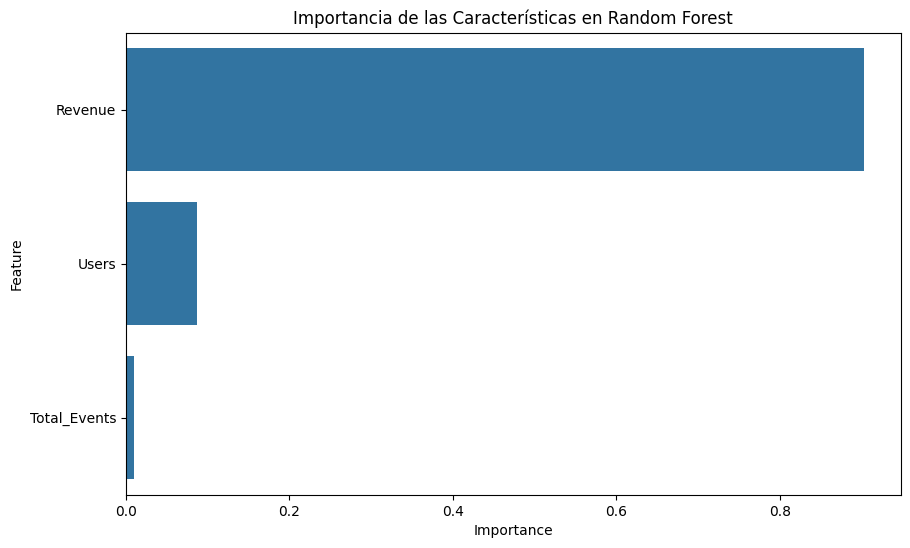

In [31]:
# Visualizar la importancia de las columnas
importances = model.feature_importances_
feature_names = features.columns

# Crear un DataFrame para la visualización
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características en Random Forest')
plt.show()

Nos muestra el gráfico que características tienen mayor impacto en las predicciones del modelo, ayudando a entender qué variables son más relevantes para análisis.